In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

### Load data: model predictions and true values

In [2]:
def calc_pc(cutoff):

    df = pd.DataFrame(columns=["wt_pdb","mut_pdb","pred_score","true_label"])
    for fold in range(10):
        df = pd.concat([df, pd.read_csv(f"model_predictions/Graphinity_predictions_test-Foldx_ddG_942723-{cutoff}-fold{fold}.csv")])
    assert df.shape[0] == 942723
        
    pc = pearsonr(df["true_label"],df["pred_score"])[0]
    
    return pc

In [3]:
pcs = []
for cutoff in ["random","cutoff_100","cutoff_90","cutoff_70","cutoff_ab_ag_70"]:
    pcs.append([cutoff.replace("random","None").replace("cutoff_ab_ag_70","Ab_70_Ag_70").replace("cutoff_",""),
                calc_pc(cutoff=cutoff)])

In [4]:
pcs_df = pd.DataFrame(pcs, columns=["Cutoff","Pearson's Correlation"])

### Plot

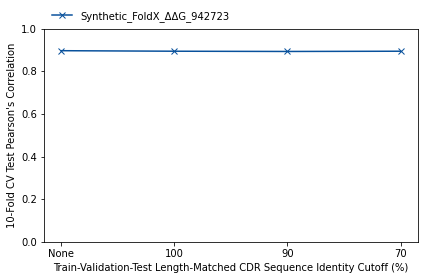

In [5]:
plt.plot(pcs_df.iloc[:4]["Cutoff"],pcs_df.iloc[:4]["Pearson's Correlation"], marker="x", color="#08519c",
         linestyle="-", label="Synthetic_FoldX_ΔΔG_942723")

plt.ylabel("10-Fold CV Test Pearson's Correlation")
plt.xlabel("Train-Validation-Test Length-Matched CDR Sequence Identity Cutoff (%)")
plt.legend(frameon=False, bbox_to_anchor=(0.52, 1.125))

plt.ylim(0,1)

plt.tight_layout()

plt.savefig("Figure-2c-Synthetic_FoldX_ddG_942723.png", dpi=300)